In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
np.random.seed(666)

In [ ]:
# Parameters
full_fare_price = 150
discount_price = 100

plane_capacity = 100

num_simulations = 200000  # the number of simulations will determine the precision of the expectation

# Distributions parameters
full_fare_mean = 56
full_fare_std = 23
discount_fare_mean = 88
discount_fare_std = 44

def simulate_demand(mean, std, num_simulations):
    """Simulates demand with given mean and standard deviation, making sure it's non-negative"""
    demand = np.random.normal(mean, std, num_simulations)
    return np.where(demand < 0, 0, demand)  # setting negative values to 0

# Simulate demands outside the function to ensure the same set of demand realizations
full_fare_demand = simulate_demand(full_fare_mean, full_fare_std, num_simulations)
discount_demand = simulate_demand(discount_fare_mean, discount_fare_std, num_simulations)

def expected_revenue(protection_level):
    # Compute sales
    discounted_sales = np.minimum(plane_capacity - protection_level, discount_demand)
    full_fare_sales = np.minimum(plane_capacity - discounted_sales, full_fare_demand)
    
    # Compute total revenue
    revenue = full_fare_price * full_fare_sales + discount_price * discounted_sales
    
    # Return the negative of the average revenue (since we want to maximize revenue, but scipy provides minimize functions)
    return -np.mean(revenue)

# Find the protection level that maximizes expected revenue
result = minimize_scalar(expected_revenue, bounds=(0, plane_capacity), method='bounded')

print(f"The optimal protection level to maximize expected revenue is: {result.x}")

In [4]:
from scipy.stats import norm

# Compute fare ratio
fare_ratio = discount_price / full_fare_price

# Compute the percentile corresponding to 1 - fare_ratio
percentile = 1 - fare_ratio

# Convert this to a z-score in the standard normal distribution
z_score = norm.ppf(percentile)

# Convert the z-score to a value in the full-fare demand distribution
full_fare_demand_percentile = full_fare_mean + z_score * full_fare_std

print(f"The theoretical percentile {percentile*100}% of full-fare demand is: {full_fare_demand_percentile}")

The theoretical percentile 33.333333333333336% of full-fare demand is: 46.09327211620448


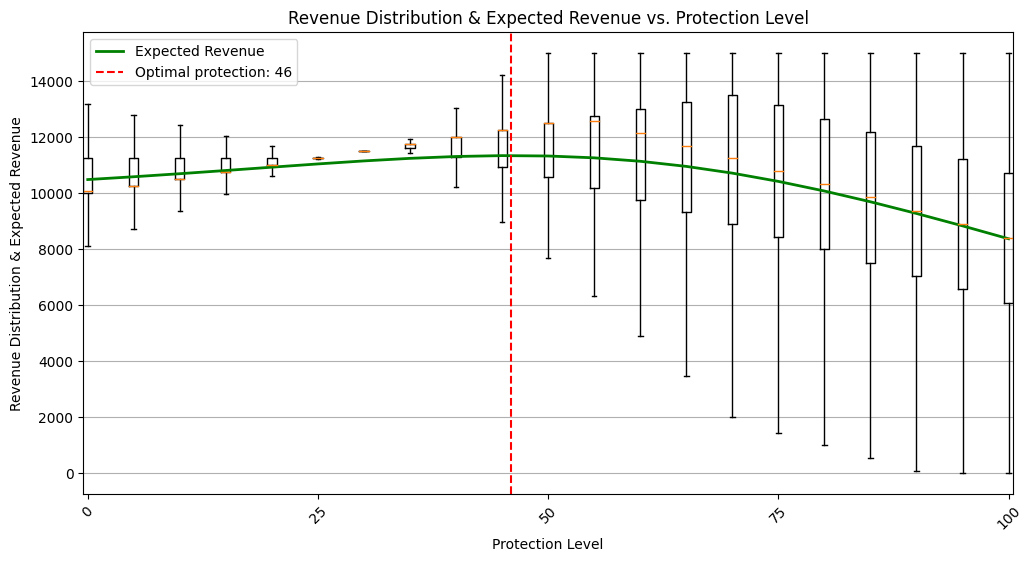

In [23]:
import matplotlib.pyplot as plt

protection_levels = list(range(0, 101,5))  # assuming 100 is also a valid protection level
revenue_distributions = []
expected_revenues = []

def calculate_revenue(protection_level):
    # Compute sales
    discounted_sales = np.minimum(plane_capacity - protection_level, discount_demand)
    full_fare_sales = np.minimum(plane_capacity - discounted_sales, full_fare_demand)
    
    # Compute total revenue
    revenue = full_fare_price * full_fare_sales + discount_price * discounted_sales
    
    return revenue

for protection in protection_levels:
    revenues = calculate_revenue(protection)
    revenue_distributions.append(revenues)
    expected_revenues.append(np.mean(revenues))

# Plot the revenue distribution for each protection level
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(revenue_distributions, positions=protection_levels, widths=1.0, showfliers=False)

ax.plot(protection_levels, expected_revenues, color='g', linewidth=2, label='Expected Revenue')

step = 5  # Change this as per your requirement
ax.set_xticks(protection_levels[::step])
ax.set_xticklabels(protection_levels[::step], rotation=45)
ax.set_xlabel("Protection Level")
ax.set_ylabel("Revenue Distribution & Expected Revenue")
ax.set_title("Revenue Distribution & Expected Revenue vs. Protection Level")


optimal_protection = int(result.x) 
ax.axvline(x=optimal_protection, color='r', linestyle='--', label=f'Optimal protection: {optimal_protection}')

ax.legend()

ax.grid(axis='y')

plt.show()

